# Data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset for bill amount


In [2]:
data1 = pd.read_csv('bill_amount.csv')
data1.head()

,bill_id,amount
0,40315104,1552.634830
1,2660045161,1032.011951
2,1148334643,6469.605351
3,3818426276,755.965425
4,9833541918,897.347816


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bill_id  13600 non-null  int64  
 1   amount   13600 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 212.6 KB


In [4]:
data1.describe()

,bill_id,amount
count,1.360000e+04,13600.000000
mean,5.007147e+09,5464.767783
std,2.885919e+09,7717.479509
min,5.584120e+05,79.496707
25%,2.485853e+09,950.689008
50%,4.992958e+09,1516.951136
75%,7.524563e+09,7307.056573
max,9.999633e+09,81849.751340


In [5]:
# check missing data

data1.head().isnull()

,bill_id,amount
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


<AxesSubplot:>

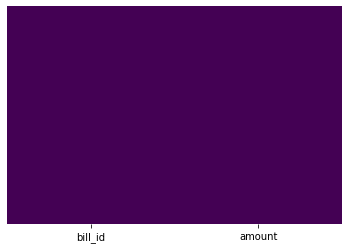

In [6]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
boolean = data1['bill_id'].duplicated().any()
print(boolean)

False


### Data set for bill ID

In [8]:
data2 = pd.read_csv('bill_id.csv')
data2.head()

,bill_id,patient_id,date_of_admission
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01


In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bill_id            13600 non-null  int64 
 1   patient_id         13600 non-null  object
 2   date_of_admission  13600 non-null  object
dtypes: int64(1), object(2)
memory usage: 318.9+ KB


In [10]:
data2.head().isnull()

,bill_id,patient_id,date_of_admission
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


<AxesSubplot:>

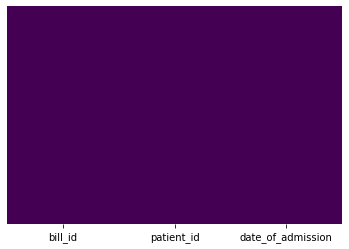

In [11]:
sns.heatmap(data2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
boolean = data2['bill_id'].duplicated().any()
print(boolean)

False


In [13]:
boolean = data2['patient_id'].duplicated().any()
print(boolean)

True


In [14]:
duplicate_pt = data2[data2.duplicated(['patient_id'])]
print(duplicate_pt)

          bill_id                        patient_id date_of_admission
2      7512568183  1d21f2be18683991eb93d182d6b2d220        2011-01-01
3      3762633379  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01
4      7654730355  1d21f2be18683991eb93d182d6b2d220        2011-01-01
5      1692196063  1d21f2be18683991eb93d182d6b2d220        2011-01-01
6       784133534  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01
...           ...                               ...               ...
13595  1641053864  a4c61deaa9ce86b4d2289eab6128b872        2015-12-28
13596  6956955826  ac52a32f8ce8c46d82df2d72052ae5a9        2015-12-28
13597  1399259594  4f67a54ab205cc9e7e2b0a4ee08e4fba        2015-12-28
13598  9243628699  a4c61deaa9ce86b4d2289eab6128b872        2015-12-28
13599  4808173213  a4c61deaa9ce86b4d2289eab6128b872        2015-12-28

[10600 rows x 3 columns]


### Dataset for clinical data



In [15]:
data3 = pd.read_csv('clinical_data.csv')
data3.head()

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,...,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,...,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0


In [16]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3400 non-null   object 
 1   date_of_admission   3400 non-null   object 
 2   date_of_discharge   3400 non-null   object 
 3   medical_history_1   3400 non-null   int64  
 4   medical_history_2   3167 non-null   float64
 5   medical_history_3   3400 non-null   object 
 6   medical_history_4   3400 non-null   int64  
 7   medical_history_5   3096 non-null   float64
 8   medical_history_6   3400 non-null   int64  
 9   medical_history_7   3400 non-null   int64  
 10  preop_medication_1  3400 non-null   int64  
 11  preop_medication_2  3400 non-null   int64  
 12  preop_medication_3  3400 non-null   int64  
 13  preop_medication_4  3400 non-null   int64  
 14  preop_medication_5  3400 non-null   int64  
 15  preop_medication_6  3400 non-null   int64  
 16  sympto

In [17]:
data3.describe()

,medical_history_1,medical_history_2,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
count,3400.000000,3167.000000,3400.000000,3096.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,...,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,0.169118,0.311336,0.052059,0.063953,0.254706,0.254412,0.503824,0.591176,0.820882,0.523235,...,0.619706,0.662353,0.544706,0.726471,0.526765,14.469882,27.431529,99.489706,78.748441,165.084412
std,0.374911,0.463113,0.222178,0.244710,0.435760,0.435594,0.500059,0.491689,0.383507,0.499533,...,0.485530,0.472977,0.498071,0.445836,0.499357,1.747323,2.463844,15.254453,10.975076,6.973678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.100000,19.700000,52.000000,48.000000,151.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.200000,25.800000,88.000000,71.200000,160.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,14.500000,27.400000,100.000000,78.900000,165.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,15.800000,29.100000,110.000000,86.300000,170.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,20.300000,35.100000,150.000000,121.000000,186.000000


In [18]:
data3.head().isnull()

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

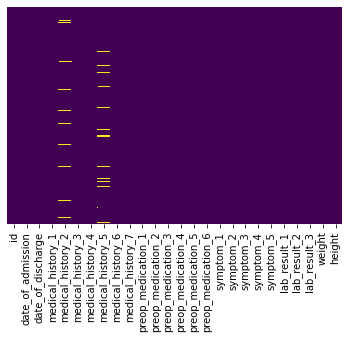

In [19]:
sns.heatmap(data3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
for col in data3.columns:
    pct_missing = np.mean(data3[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
date_of_admission - 0%
date_of_discharge - 0%
medical_history_1 - 0%
medical_history_2 - 7%
medical_history_3 - 0%
medical_history_4 - 0%
medical_history_5 - 9%
medical_history_6 - 0%
medical_history_7 - 0%
preop_medication_1 - 0%
preop_medication_2 - 0%
preop_medication_3 - 0%
preop_medication_4 - 0%
preop_medication_5 - 0%
preop_medication_6 - 0%
symptom_1 - 0%
symptom_2 - 0%
symptom_3 - 0%
symptom_4 - 0%
symptom_5 - 0%
lab_result_1 - 0%
lab_result_2 - 0%
lab_result_3 - 0%
weight - 0%
height - 0%


In [21]:
sum_missing = data3.isnull().sum().sum()
print(sum_missing)

537


In [22]:
boolean = data3['id'].duplicated().any()
print(boolean)

True


In [23]:
duplicate_id = data3[data3.duplicated(['id'], keep=False)].sort_values(by=['id'])
print(duplicate_id)

                                    id date_of_admission date_of_discharge  \
3327  012c5eb5397a72f8aeb64f942b60846d        2015-11-17        2015-11-27   
301   012c5eb5397a72f8aeb64f942b60846d        2011-06-08        2011-06-23   
2122  0284ec8aa1e6ced9ddaa7702b841248d        2014-02-26        2014-03-04   
2384  0284ec8aa1e6ced9ddaa7702b841248d        2014-06-21        2014-07-04   
3005  03d6bdbc614a5bdbeadf5b981a59c423        2015-06-04        2015-06-19   
...                                ...               ...               ...   
2240  feb52392f4d58a02254cbd0ba634312f        2014-04-19        2014-04-29   
1187  ff6de9534e28ea31f928ac79c399ecd6        2012-10-07        2012-10-13   
23    ff6de9534e28ea31f928ac79c399ecd6        2011-01-13        2011-01-26   
2851  ff7a523f1dbd0385e731b4185cf64683        2015-03-16        2015-03-29   
2619  ff7a523f1dbd0385e731b4185cf64683        2014-11-09        2014-11-19   

      medical_history_1  medical_history_2 medical_history_3  \

In [24]:
# export table to check for possible inconsistencies of medical history for same patient 

duplicate_id.to_csv(r'duplicate_id1.csv')

In [25]:
data3_slice = data3.drop(['id', 'date_of_admission', 'date_of_discharge', 'lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height'], axis=1)

print(data3_slice)

      medical_history_1  medical_history_2 medical_history_3  \
0                     0                1.0                 0   
1                     0                0.0                 0   
2                     0                0.0                 0   
3                     0                1.0                No   
4                     0                0.0                No   
...                 ...                ...               ...   
3395                  0                0.0                 0   
3396                  0                0.0                 0   
3397                  0                0.0                 0   
3398                  0                1.0                 0   
3399                  0                NaN                 1   

      medical_history_4  medical_history_5  medical_history_6  \
0                     0                0.0                  0   
1                     0                0.0                  0   
2                     0             

In [26]:
#check unique values for medical history and symptoms

for col in list(data3_slice):
    print(data3_slice[col].unique())

[0 1]
[ 1.  0. nan]
['0' 'No' '1' 'Yes']
[0 1]
[ 0. nan  1.]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]


In [27]:
df3 = data3

df3['medical_history_3'] = df3['medical_history_3'].replace(['No'], '0')

df3['medical_history_3'] = df3['medical_history_3'].replace(['Yes'], '1')

df3['medical_history_3'] = pd.to_numeric(df3['medical_history_3'])

print(df3.dtypes)

id                     object
date_of_admission      object
date_of_discharge      object
medical_history_1       int64
medical_history_2     float64
medical_history_3       int64
medical_history_4       int64
medical_history_5     float64
medical_history_6       int64
medical_history_7       int64
preop_medication_1      int64
preop_medication_2      int64
preop_medication_3      int64
preop_medication_4      int64
preop_medication_5      int64
preop_medication_6      int64
symptom_1               int64
symptom_2               int64
symptom_3               int64
symptom_4               int64
symptom_5               int64
lab_result_1          float64
lab_result_2          float64
lab_result_3          float64
weight                float64
height                float64
dtype: object


In [28]:
df3.rename(columns = {'id':'patient_id'}, inplace = True)
print(df3.head(2))

                         patient_id date_of_admission date_of_discharge  \
0  1d21f2be18683991eb93d182d6b2d220        2011-01-01        2011-01-11   
1  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01        2011-01-11   

   medical_history_1  medical_history_2  medical_history_3  medical_history_4  \
0                  0                1.0                  0                  0   
1                  0                0.0                  0                  0   

   medical_history_5  medical_history_6  medical_history_7  ...  symptom_1  \
0                0.0                  0                  0  ...          0   
1                0.0                  0                  0  ...          0   

   symptom_2  symptom_3  symptom_4  symptom_5  lab_result_1  lab_result_2  \
0          0          0          1          1          13.2          30.9   
1          0          1          1          1          13.8          22.6   

   lab_result_3  weight  height  
0         123.0    71.3   161

In [29]:
# Create separate tables for missing values and without missing values for comparison later

df3_missing = df3[df3.isnull().any(axis=1)]

print(df3_missing)

                            patient_id date_of_admission date_of_discharge  \
5     59e07adc2dbc5f70131f57d003610d74        2011-01-07        2011-01-17   
10    d45fcf3bec63ae3b436be42fad33b9e0        2011-01-12        2011-01-18   
14    c59af905597b9be72420bbdbdad2ce42        2011-01-10        2011-01-22   
20    7ce28b0d1309e0a2a74e38747ebd3f6c        2011-01-11        2011-01-25   
22    c9809bb40710a9079848f06d47ef980b        2011-01-14        2011-01-25   
...                                ...               ...               ...   
3385  be9f6767432045cd1a0d71b6afbd015a        2015-12-16        2015-12-28   
3386  228e27d883c5bd9af820add27c253d53        2015-12-24        2015-12-30   
3388  336bfb12d416ddf4a2475bb00b318cf1        2015-12-19        2016-01-01   
3398  5189c62dfb8e6075b5c7fd4766671bd4        2015-12-26        2016-01-09   
3399  a4c61deaa9ce86b4d2289eab6128b872        2015-12-28        2016-01-11   

      medical_history_1  medical_history_2  medical_history_3  

In [30]:
df3_nomissing = df3.dropna()
print(df3_nomissing)

                            patient_id date_of_admission date_of_discharge  \
0     1d21f2be18683991eb93d182d6b2d220        2011-01-01        2011-01-11   
1     62bdca0b95d97e99e1c712048fb9fd09        2011-01-01        2011-01-11   
2     c85cf97bc6307ded0dd4fef8bad2fa09        2011-01-02        2011-01-13   
3     e0397dd72caf4552c5babebd3d61736c        2011-01-02        2011-01-14   
4     94ade3cd5f66f4584902554dff170a29        2011-01-08        2011-01-16   
...                                ...               ...               ...   
3393  f253e6e69fdc53f07ec682df8ed1a80e        2015-12-21        2016-01-05   
3394  3f052a68d7c25d817a63aa1ba70f4dc2        2015-12-21        2016-01-06   
3395  4368c266084e640c469a5d41b339805c        2015-12-26        2016-01-07   
3396  4f67a54ab205cc9e7e2b0a4ee08e4fba        2015-12-28        2016-01-07   
3397  ac52a32f8ce8c46d82df2d72052ae5a9        2015-12-28        2016-01-08   

      medical_history_1  medical_history_2  medical_history_3  

### Dataset for demographics

In [31]:
data4 = pd.read_csv('demographics.csv')
data4.head()

,patient_id,gender,race,resident_status,date_of_birth
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14
1,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15
4,541ad077cb4a0e64cc422673afe28aef,m,Chinese,Singaporean,1970-12-12


In [32]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_id       3000 non-null   object
 1   gender           3000 non-null   object
 2   race             3000 non-null   object
 3   resident_status  3000 non-null   object
 4   date_of_birth    3000 non-null   object
dtypes: object(5)
memory usage: 117.3+ KB


In [33]:
data4.describe()

,patient_id,gender,race,resident_status,date_of_birth
count,3000,3000,3000,3000,3000
unique,3000,4,6,4,2746
top,7317c74375502ebd94f6df80ba072d06,Female,Chinese,Singaporean,1975-08-20
freq,1,1396,1608,1782,4


<AxesSubplot:>

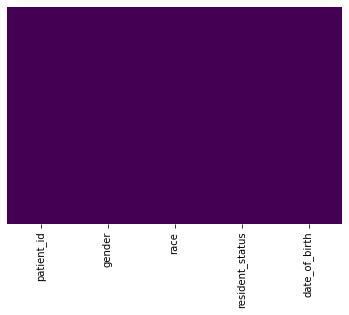

In [34]:
sns.heatmap(data4.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
boolean = data4['patient_id'].duplicated().any()
print(boolean)

False


In [36]:
data4['gender'].unique().tolist()

['Female', 'f', 'Male', 'm']

In [37]:
# standardise unique names for each column

df4 = data4

df4['gender'] = df4['gender'].replace(['f'], 'Female')

df4['gender'] = df4['gender'].replace(['m'], 'Male')

In [38]:
df4['gender'].unique().tolist()

['Female', 'Male']

In [39]:
data4['race'].unique().tolist()

['Indian', 'Chinese', 'Malay', 'chinese', 'India', 'Others']

In [40]:
df4['race'] = df4['race'].replace(['chinese'], 'Chinese')

df4['race'] = df4['race'].replace(['India'], 'Indian')

df4['race'].unique().tolist()

['Indian', 'Chinese', 'Malay', 'Others']

In [41]:
data4['resident_status'].unique().tolist()

['Singaporean', 'Singapore citizen', 'PR', 'Foreigner']

In [42]:
df4['resident_status'] = df4['resident_status'].replace(['Singapore citizen'], 'Singaporean')

df4['resident_status'].unique().tolist()

['Singaporean', 'PR', 'Foreigner']

### Removing missing values

There are missing values in columns for medical_history_2 and medical_history_5. 

I compared a table that includes all rows with at least one missing value against another table without any missing value at all. The comparison was based looking at how similar the overall statistical measures (eg. mean, std) for the variables were. In the end, I decided to drop the missing values as there was no obvious difference. There is an estimated 15% loss of data as a result. 

I did not do imputation for medical histories as they are categorical and I prefer not to use this method in this case. 

In [43]:
# compare tables with and without missing values

df_merge1 = pd.merge(data1, data2, on="bill_id")

print(df_merge1.head(3))

      bill_id       amount                        patient_id date_of_admission
0    40315104  1552.634830  96a76ec5bbcb1d1562c40b9b972e356d        2012-10-22
1  2660045161  1032.011951  796de06efdad342d3f3a379dff0bd63c        2014-09-28
2  1148334643  6469.605351  1ce104904e9160cf3cfdb3c45b9ce4ff        2014-01-16


In [44]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 0 to 13599
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_id            13600 non-null  int64  
 1   amount             13600 non-null  float64
 2   patient_id         13600 non-null  object 
 3   date_of_admission  13600 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 531.2+ KB


In [45]:
# consolidate all bill amount for same patient admitted on the same day; bill_id column taken out

df_merge1 = df_merge1.groupby(['patient_id','date_of_admission'])['amount'].sum()

print(df_merge1)

patient_id                        date_of_admission
00225710a878eff524a1d13be817e8e2  2014-04-10            5190.566695
0029d90eb654699c18001c17efb0f129  2012-11-07           22601.497872
0040333abd68527ecb53e1db9073f52e  2013-01-19           17447.181635
00473b58e3dc8ae37b3cb34069705083  2014-02-10           15285.883220
0078662d1d983dde68ea057c42d5b5cf  2012-04-28           73477.869010
                                                           ...     
ffa5a615a4cc5fb1ada0443edc1f5dd3  2011-04-24            4676.066179
ffac3c4b6838f42625e1dd00dd7c867b  2015-11-28           14049.042774
ffc19537fa6621512ef4f296d60896ce  2013-05-05           30053.620971
ffd67c2bcfb32508d2cf7b1e1193e2ed  2012-12-24           28007.636468
ffd9644f8daf1d28493a7cd700bb30f4  2013-06-04           21040.661990
Name: amount, Length: 3400, dtype: float64


In [46]:
#df_merge1.to_csv(r'df_merge1.csv')

In [47]:
df_merge2_missing = pd.merge(df_merge1, df3_missing,  how='inner', on=['patient_id','date_of_admission'])
print (df_merge2_missing)

                           patient_id date_of_admission        amount  \
0    010cf28233f50d3857b499a9c208c610        2011-02-03  25612.364148   
1    012c5eb5397a72f8aeb64f942b60846d        2015-11-17  30485.659969   
2    0230b3529ddf67d50794447d01892cf9        2012-08-28  27156.932586   
3    03d6bdbc614a5bdbeadf5b981a59c423        2015-06-04  25947.296318   
4    0634b01e252c565f3839f1fa8eedc9c4        2011-05-18  18219.478260   
..                                ...               ...           ...   
497  fd3e5cf7498a03a936394df6e81c40fe        2013-08-18  28520.892630   
498  fde81a814e5fa9ace85e52825427d1b4        2013-11-12  14654.218296   
499  fe43e003c70749f3b30d010810b3c16f        2014-06-02  15079.219933   
500  febf849a668d5836607ebeb194861d8c        2011-03-16  24160.141903   
501  fef5a92a834665d18a5e5a99e862b42f        2015-07-09  26509.700899   

    date_of_discharge  medical_history_1  medical_history_2  \
0          2011-02-11                  0                0.0 

In [48]:
df_merge2_nomissing = pd.merge(df_merge1, df3_nomissing,  how='inner', on=['patient_id','date_of_admission'])
print (df_merge2_nomissing)

                            patient_id date_of_admission        amount  \
0     00225710a878eff524a1d13be817e8e2        2014-04-10   5190.566695   
1     0029d90eb654699c18001c17efb0f129        2012-11-07  22601.497872   
2     0040333abd68527ecb53e1db9073f52e        2013-01-19  17447.181635   
3     00473b58e3dc8ae37b3cb34069705083        2014-02-10  15285.883220   
4     0078662d1d983dde68ea057c42d5b5cf        2012-04-28  73477.869010   
...                                ...               ...           ...   
2893  ffa5a615a4cc5fb1ada0443edc1f5dd3        2011-04-24   4676.066179   
2894  ffac3c4b6838f42625e1dd00dd7c867b        2015-11-28  14049.042774   
2895  ffc19537fa6621512ef4f296d60896ce        2013-05-05  30053.620971   
2896  ffd67c2bcfb32508d2cf7b1e1193e2ed        2012-12-24  28007.636468   
2897  ffd9644f8daf1d28493a7cd700bb30f4        2013-06-04  21040.661990   

     date_of_discharge  medical_history_1  medical_history_2  \
0           2014-04-22                  0      

In [49]:
# add column for length of stay

df_merge2_missing['date_of_admission'] = pd.to_datetime(df_merge2_missing['date_of_admission'])
df_merge2_missing['date_of_discharge'] = pd.to_datetime(df_merge2_missing['date_of_discharge'])

df_merge2_missing['lth_of_stay'] = df_merge2_missing['date_of_discharge'] - df_merge2_missing['date_of_admission']

print(df_merge2_missing)


                           patient_id date_of_admission        amount  \
0    010cf28233f50d3857b499a9c208c610        2011-02-03  25612.364148   
1    012c5eb5397a72f8aeb64f942b60846d        2015-11-17  30485.659969   
2    0230b3529ddf67d50794447d01892cf9        2012-08-28  27156.932586   
3    03d6bdbc614a5bdbeadf5b981a59c423        2015-06-04  25947.296318   
4    0634b01e252c565f3839f1fa8eedc9c4        2011-05-18  18219.478260   
..                                ...               ...           ...   
497  fd3e5cf7498a03a936394df6e81c40fe        2013-08-18  28520.892630   
498  fde81a814e5fa9ace85e52825427d1b4        2013-11-12  14654.218296   
499  fe43e003c70749f3b30d010810b3c16f        2014-06-02  15079.219933   
500  febf849a668d5836607ebeb194861d8c        2011-03-16  24160.141903   
501  fef5a92a834665d18a5e5a99e862b42f        2015-07-09  26509.700899   

    date_of_discharge  medical_history_1  medical_history_2  \
0          2011-02-11                  0                0.0 

In [50]:
df_merge2_nomissing['date_of_admission'] = pd.to_datetime(df_merge2_nomissing['date_of_admission'])
df_merge2_nomissing['date_of_discharge'] = pd.to_datetime(df_merge2_nomissing['date_of_discharge'])

df_merge2_nomissing['lth_of_stay'] = df_merge2_nomissing['date_of_discharge'] - df_merge2_nomissing['date_of_admission']

print(df_merge2_nomissing)

                            patient_id date_of_admission        amount  \
0     00225710a878eff524a1d13be817e8e2        2014-04-10   5190.566695   
1     0029d90eb654699c18001c17efb0f129        2012-11-07  22601.497872   
2     0040333abd68527ecb53e1db9073f52e        2013-01-19  17447.181635   
3     00473b58e3dc8ae37b3cb34069705083        2014-02-10  15285.883220   
4     0078662d1d983dde68ea057c42d5b5cf        2012-04-28  73477.869010   
...                                ...               ...           ...   
2893  ffa5a615a4cc5fb1ada0443edc1f5dd3        2011-04-24   4676.066179   
2894  ffac3c4b6838f42625e1dd00dd7c867b        2015-11-28  14049.042774   
2895  ffc19537fa6621512ef4f296d60896ce        2013-05-05  30053.620971   
2896  ffd67c2bcfb32508d2cf7b1e1193e2ed        2012-12-24  28007.636468   
2897  ffd9644f8daf1d28493a7cd700bb30f4        2013-06-04  21040.661990   

     date_of_discharge  medical_history_1  medical_history_2  \
0           2014-04-22                  0      

In [51]:
# compare some variables in table with missing values against table without missing values to check similarity

df_merge2_missing.describe()

,amount,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,lth_of_stay
count,502.000000,502.000000,269.000000,502.000000,502.000000,198.000000,502.000000,502.000000,502.000000,502.000000,...,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502
mean,21357.813168,0.155378,0.245353,0.129482,0.037849,0.050505,0.245020,0.256972,0.523904,0.611554,...,0.665339,0.511952,0.731076,0.517928,14.537849,27.487450,99.330677,78.104183,164.800797,11 days 01:57:36.573705179
std,9160.365150,0.362626,0.431098,0.336068,0.191020,0.219540,0.430528,0.437400,0.499926,0.487883,...,0.472343,0.500356,0.443843,0.500177,1.752125,2.346957,15.018758,10.620067,6.622420,2 days 18:18:09.890232525
min,4738.134789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.100000,20.400000,52.000000,49.500000,151.000000,3 days 00:00:00
25%,14524.245795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,13.300000,25.800000,89.250000,70.525000,160.000000,9 days 00:00:00
50%,20283.167242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,14.600000,27.500000,100.000000,78.250000,165.000000,11 days 00:00:00
75%,26449.516435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,15.800000,29.000000,109.000000,85.575000,169.000000,13 days 00:00:00
max,68593.118633,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,18.900000,35.000000,137.000000,111.500000,183.000000,18 days 00:00:00


In [52]:
df_merge2_nomissing.describe()

,amount,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,lth_of_stay
count,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,...,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898
mean,21945.900495,0.171498,0.317460,0.137336,0.054520,0.064872,0.256384,0.253968,0.500345,0.587647,...,0.661836,0.550380,0.725673,0.528295,14.458109,27.421843,99.517253,78.860041,165.133540,11 days 01:06:05.217391304
std,10316.927624,0.377008,0.465569,0.344261,0.227081,0.246343,0.436711,0.435355,0.500086,0.492343,...,0.473166,0.497541,0.446252,0.499285,1.746524,2.483794,15.297303,11.033373,7.032675,2 days 20:46:15.909408694
min,2946.100354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.100000,19.700000,57.000000,48.000000,151.000000,1 days 00:00:00
25%,14887.246362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,13.200000,25.700000,88.000000,71.300000,160.000000,9 days 00:00:00
50%,20163.249584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,14.400000,27.400000,100.000000,79.000000,165.000000,11 days 00:00:00
75%,26810.081562,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,15.700000,29.200000,110.000000,86.375000,171.000000,13 days 00:00:00
max,98723.854994,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,20.300000,35.100000,150.000000,121.000000,186.000000,20 days 00:00:00


In [53]:
df_merge2_missing = pd.merge(df_merge2_missing, df4, on=['patient_id'])

print(df_merge2_missing)

                           patient_id date_of_admission        amount  \
0    010cf28233f50d3857b499a9c208c610        2011-02-03  25612.364148   
1    012c5eb5397a72f8aeb64f942b60846d        2015-11-17  30485.659969   
2    0230b3529ddf67d50794447d01892cf9        2012-08-28  27156.932586   
3    03d6bdbc614a5bdbeadf5b981a59c423        2015-06-04  25947.296318   
4    0634b01e252c565f3839f1fa8eedc9c4        2011-05-18  18219.478260   
..                                ...               ...           ...   
497  fd3e5cf7498a03a936394df6e81c40fe        2013-08-18  28520.892630   
498  fde81a814e5fa9ace85e52825427d1b4        2013-11-12  14654.218296   
499  fe43e003c70749f3b30d010810b3c16f        2014-06-02  15079.219933   
500  febf849a668d5836607ebeb194861d8c        2011-03-16  24160.141903   
501  fef5a92a834665d18a5e5a99e862b42f        2015-07-09  26509.700899   

    date_of_discharge  medical_history_1  medical_history_2  \
0          2011-02-11                  0                0.0 

In [54]:
# add column for age on date of admission 

df_merge2_missing['date_of_birth'] = pd.to_datetime(df_merge2_missing['date_of_birth'])

df_merge2_missing['age'] = ((df_merge2_missing['date_of_admission'] - df_merge2_missing['date_of_birth']).dt.days //365.25)

df_merge2_missing['age'] = df_merge2_missing['age'].astype(np.int64)

print(df_merge2_missing)

                           patient_id date_of_admission        amount  \
0    010cf28233f50d3857b499a9c208c610        2011-02-03  25612.364148   
1    012c5eb5397a72f8aeb64f942b60846d        2015-11-17  30485.659969   
2    0230b3529ddf67d50794447d01892cf9        2012-08-28  27156.932586   
3    03d6bdbc614a5bdbeadf5b981a59c423        2015-06-04  25947.296318   
4    0634b01e252c565f3839f1fa8eedc9c4        2011-05-18  18219.478260   
..                                ...               ...           ...   
497  fd3e5cf7498a03a936394df6e81c40fe        2013-08-18  28520.892630   
498  fde81a814e5fa9ace85e52825427d1b4        2013-11-12  14654.218296   
499  fe43e003c70749f3b30d010810b3c16f        2014-06-02  15079.219933   
500  febf849a668d5836607ebeb194861d8c        2011-03-16  24160.141903   
501  fef5a92a834665d18a5e5a99e862b42f        2015-07-09  26509.700899   

    date_of_discharge  medical_history_1  medical_history_2  \
0          2011-02-11                  0                0.0 

In [55]:
df_merge2_nomissing = pd.merge(df_merge2_nomissing, df4, on=['patient_id'])

df_merge2_nomissing['date_of_birth'] = pd.to_datetime(df_merge2_nomissing['date_of_birth'])

df_merge2_nomissing['age'] = ((df_merge2_nomissing['date_of_admission'] - df_merge2_nomissing['date_of_birth']).dt.days //365.25)

df_merge2_nomissing['age'] = df_merge2_nomissing['age'].astype(np.int64)

print(df_merge2_nomissing)

                            patient_id date_of_admission        amount  \
0     00225710a878eff524a1d13be817e8e2        2014-04-10   5190.566695   
1     0029d90eb654699c18001c17efb0f129        2012-11-07  22601.497872   
2     0040333abd68527ecb53e1db9073f52e        2013-01-19  17447.181635   
3     00473b58e3dc8ae37b3cb34069705083        2014-02-10  15285.883220   
4     0078662d1d983dde68ea057c42d5b5cf        2012-04-28  73477.869010   
...                                ...               ...           ...   
2893  ffa5a615a4cc5fb1ada0443edc1f5dd3        2011-04-24   4676.066179   
2894  ffac3c4b6838f42625e1dd00dd7c867b        2015-11-28  14049.042774   
2895  ffc19537fa6621512ef4f296d60896ce        2013-05-05  30053.620971   
2896  ffd67c2bcfb32508d2cf7b1e1193e2ed        2012-12-24  28007.636468   
2897  ffd9644f8daf1d28493a7cd700bb30f4        2013-06-04  21040.661990   

     date_of_discharge  medical_history_1  medical_history_2  \
0           2014-04-22                  0      

In [56]:
df_merge2_missing.describe()

,amount,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,lth_of_stay,age
count,502.000000,502.000000,269.000000,502.000000,502.000000,198.000000,502.000000,502.000000,502.000000,502.000000,...,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502,502.000000
mean,21357.813168,0.155378,0.245353,0.129482,0.037849,0.050505,0.245020,0.256972,0.523904,0.611554,...,0.511952,0.731076,0.517928,14.537849,27.487450,99.330677,78.104183,164.800797,11 days 01:57:36.573705179,52.669323
std,9160.365150,0.362626,0.431098,0.336068,0.191020,0.219540,0.430528,0.437400,0.499926,0.487883,...,0.500356,0.443843,0.500177,1.752125,2.346957,15.018758,10.620067,6.622420,2 days 18:18:09.890232525,14.665200
min,4738.134789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.100000,20.400000,52.000000,49.500000,151.000000,3 days 00:00:00,26.000000
25%,14524.245795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.300000,25.800000,89.250000,70.525000,160.000000,9 days 00:00:00,39.000000
50%,20283.167242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,14.600000,27.500000,100.000000,78.250000,165.000000,11 days 00:00:00,52.000000
75%,26449.516435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,15.800000,29.000000,109.000000,85.575000,169.000000,13 days 00:00:00,64.750000
max,68593.118633,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,18.900000,35.000000,137.000000,111.500000,183.000000,18 days 00:00:00,83.000000


In [57]:
df_merge2_nomissing.describe()

,amount,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,lth_of_stay,age
count,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,...,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898,2898.000000
mean,21945.900495,0.171498,0.317460,0.137336,0.054520,0.064872,0.256384,0.253968,0.500345,0.587647,...,0.550380,0.725673,0.528295,14.458109,27.421843,99.517253,78.860041,165.133540,11 days 01:06:05.217391304,51.928571
std,10316.927624,0.377008,0.465569,0.344261,0.227081,0.246343,0.436711,0.435355,0.500086,0.492343,...,0.497541,0.446252,0.499285,1.746524,2.483794,15.297303,11.033373,7.032675,2 days 20:46:15.909408694,14.702600
min,2946.100354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.100000,19.700000,57.000000,48.000000,151.000000,1 days 00:00:00,21.000000
25%,14887.246362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.200000,25.700000,88.000000,71.300000,160.000000,9 days 00:00:00,39.000000
50%,20163.249584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,14.400000,27.400000,100.000000,79.000000,165.000000,11 days 00:00:00,50.000000
75%,26810.081562,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,15.700000,29.200000,110.000000,86.375000,171.000000,13 days 00:00:00,64.000000
max,98723.854994,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,20.300000,35.100000,150.000000,121.000000,186.000000,20 days 00:00:00,85.000000


In [59]:
df_merge2_nomissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2898 entries, 0 to 2897
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   patient_id          2898 non-null   object         
 1   date_of_admission   2898 non-null   datetime64[ns] 
 2   amount              2898 non-null   float64        
 3   date_of_discharge   2898 non-null   datetime64[ns] 
 4   medical_history_1   2898 non-null   int64          
 5   medical_history_2   2898 non-null   float64        
 6   medical_history_3   2898 non-null   int64          
 7   medical_history_4   2898 non-null   int64          
 8   medical_history_5   2898 non-null   float64        
 9   medical_history_6   2898 non-null   int64          
 10  medical_history_7   2898 non-null   int64          
 11  preop_medication_1  2898 non-null   int64          
 12  preop_medication_2  2898 non-null   int64          
 13  preop_medication_3  2898 non-null

In [60]:
df_merge2_nomissing['amount'] = df_merge2_nomissing['amount'].round(1)

In [61]:
df_merge2_nomissing.head()

,patient_id,date_of_admission,amount,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,...,lab_result_2,lab_result_3,weight,height,lth_of_stay,gender,race,resident_status,date_of_birth,age
0,00225710a878eff524a1d13be817e8e2,2014-04-10,5190.6,2014-04-22,0,0.0,0,0,0.0,0,...,27.9,96.0,66.9,155.0,12 days,Female,Chinese,Singaporean,1983-01-16,31
1,0029d90eb654699c18001c17efb0f129,2012-11-07,22601.5,2012-11-20,0,1.0,0,0,0.0,1,...,26.5,109.0,89.1,160.0,13 days,Female,Chinese,Singaporean,1943-10-14,69
2,0040333abd68527ecb53e1db9073f52e,2013-01-19,17447.2,2013-01-31,0,1.0,0,0,0.0,0,...,25.2,96.0,79.5,172.0,12 days,Male,Indian,Singaporean,1972-08-26,40
3,00473b58e3dc8ae37b3cb34069705083,2014-02-10,15285.9,2014-02-15,1,0.0,0,0,0.0,0,...,28.7,122.0,81.1,160.0,5 days,Female,Chinese,Singaporean,1976-07-23,37
4,0078662d1d983dde68ea057c42d5b5cf,2012-04-28,73477.9,2012-05-10,0,1.0,0,0,0.0,1,...,27.2,89.0,74.7,173.0,12 days,Male,Malay,Foreigner,1942-10-19,69


### Check for outliers

<AxesSubplot:xlabel='weight', ylabel='height'>

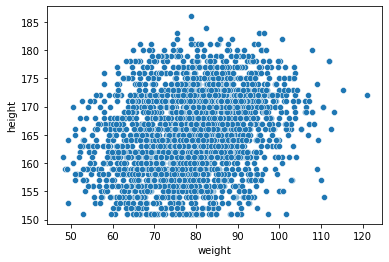

In [62]:

datacol = df_merge2_nomissing[['weight', 'height']]
datacol.columns
sns.scatterplot(data=df_merge2_nomissing, x="weight", y="height")


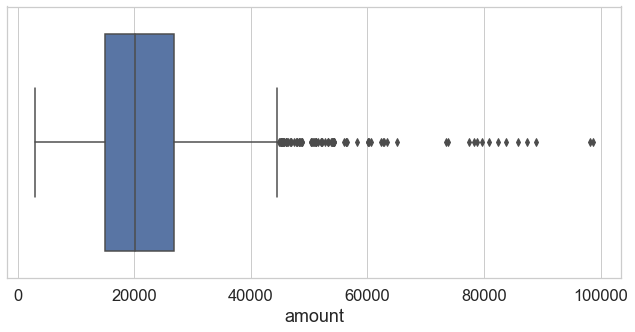

In [81]:
sns.set(rc={'figure.figsize':(11,5)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x=df_merge2_nomissing['amount'])
plt.savefig("bill.png", bbox_inches='tight')

# several outliers for bill amount; high amount could skew data but will keep for now to analyse later

In [67]:
#data['difference'].astype('timedelta64[D]')

df_merge2_nomissing['lth_of_stay'] = df_merge2_nomissing['lth_of_stay'].astype('timedelta64[D]')

<AxesSubplot:xlabel='amount', ylabel='lth_of_stay'>

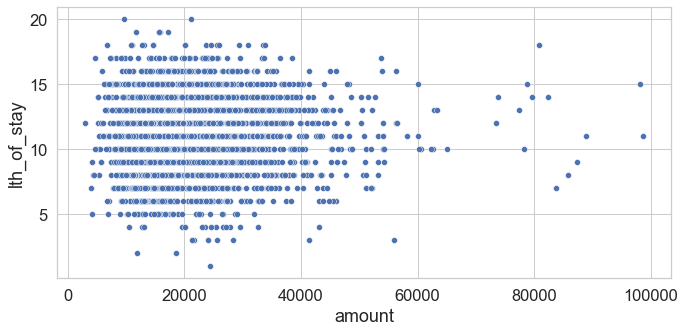

In [68]:

sns.scatterplot(data=df_merge2_nomissing, x="amount", y="lth_of_stay")

<AxesSubplot:xlabel='lab_result_1'>

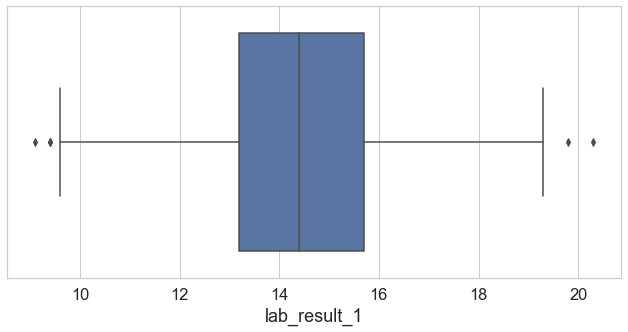

In [74]:
sns.boxplot(x=df_merge2_nomissing['lab_result_1'])

<AxesSubplot:xlabel='lab_result_2'>

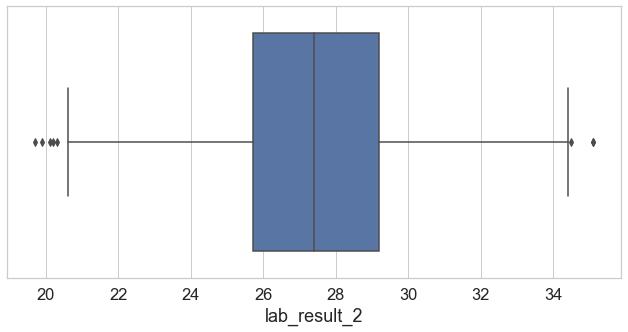

In [73]:
sns.boxplot(x=df_merge2_nomissing['lab_result_2'])

<AxesSubplot:xlabel='lab_result_3'>

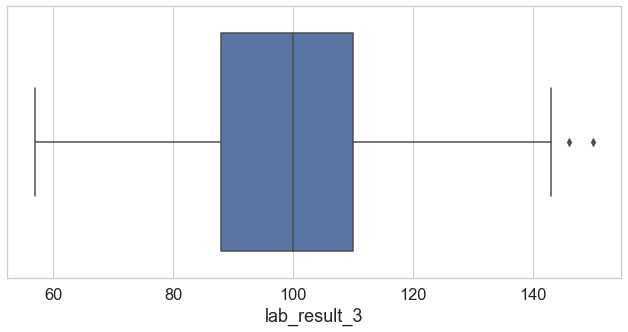

In [75]:
sns.boxplot(x=df_merge2_nomissing['lab_result_3'])

<AxesSubplot:xlabel='age'>

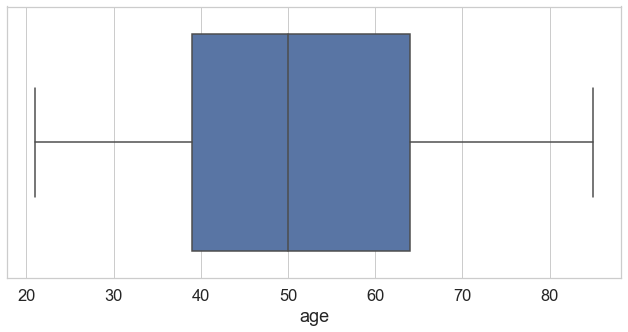

In [76]:
sns.boxplot(x=df_merge2_nomissing['age'])